## Importing required libraries

In [163]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Data Preprocessing

In [2]:
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Exploratory Data Analysis(EDA)

In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data.isnull().sum()/len(data)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

**Age, Cabin and Embarked has 19%, 77% and 0.2% of missing values**

## Checking and removing duplicate rows

In [8]:
data.duplicated().sum()

0

## Creating new features

**Age_Band**

In [9]:
data['Age_band'] = 0
data.loc[data['Age']<=1, 'Age_band'] = 'Infant'
data.loc[(data['Age']>1) & (data['Age']<=12), 'Age_band'] = 'Children'
data.loc[data['Age']>12,'Age_band'] = 'Adult'


In [10]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Adult
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Children
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Adult
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Adult


**Fare_band**

In [11]:
data['Fare_band'] = 0
data.loc[(data['Fare']>=0) & (data['Fare']<=10), 'Fare_band'] = 1
data.loc[(data['Fare']>10) & (data['Fare']<=15), 'Fare_band'] = 2
data.loc[(data['Fare']>15) & (data['Fare']<=35), 'Fare_band'] = 3
data.loc[data['Fare']>35, 'Fare_band'] = 4

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_band,Fare_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,1


## Extracting titles and test correlation between title and survived

In [12]:
data['Title'] = data.Name.str.extract('([A-Za-z]+)\.', expand=False)
pd.crosstab(data['Title'], data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [13]:
data['Title']= data['Title'].replace(['Capt','Col','Countess','Don','Dr','Jonkheer','Lady','Major'
                                                        ,'Rev','Sir'],'Rare')
data['Title'] = data['Title'].replace('Mlle', 'Miss')
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')
    
data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


Survival rate is high in 'Mrs' and low in "Mr".

## Filling missing values

In [14]:
data.Embarked = data.Embarked.fillna(data['Embarked'].mode()[0])
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Age_band         0
Fare_band        0
Title            0
dtype: int64

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

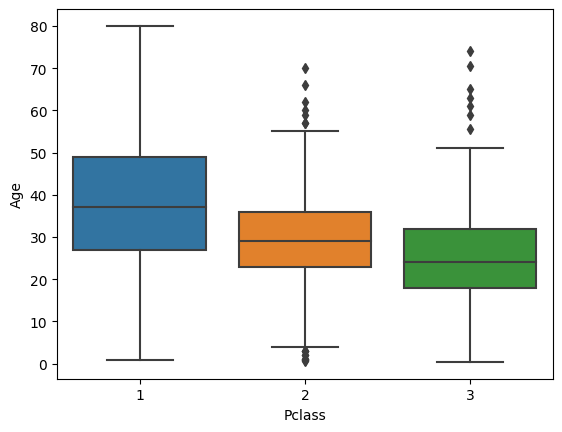

In [15]:
sns.boxplot(x='Pclass', y='Age', data=data)

**We see that rich person that are travelling in 1st class tend to be older. We will use this to fill missing values in Age.**

In [16]:
def fill_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
        
    else:
        return Age

In [17]:
data['Age'] = data[['Age', 'Pclass']].apply(fill_age,axis=1)

data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Age_band         0
Fare_band        0
Title            0
dtype: int64

## Converting Categorical features into Ordinal

In [18]:
title_mapping = {'Mr':1, "Miss":2, "Mrs":3, 'Master':4, 'Rare':5}
data['Title'] = data['Title'].map(title_mapping)
data['Title'] = data['Title'].fillna(0)

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_band,Fare_band,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,4,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,4,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,1,1


**Converting Sex into female = 1 and male = 0**

In [19]:
data['Sex'] = data['Sex'].map({'female':1, 'male':0})
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_band,Fare_band,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Adult,4,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Adult,4,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Adult,1,1


**Converting Embarked to ordinal**

In [20]:
data['Embarked'] = data['Embarked'].map({'S':0, 'C':1, 'Q':2})
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_band,Fare_band,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,Adult,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,Adult,4,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,Adult,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,Adult,4,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,Adult,1,1


## Dropping features that are not important

In [21]:
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [22]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_band,Fare_band,Title
0,0,3,0,22.0,1,0,7.2500,0,Adult,1,1
1,1,1,1,38.0,1,0,71.2833,1,Adult,4,3
2,1,3,1,26.0,0,0,7.9250,0,Adult,1,2
3,1,1,1,35.0,1,0,53.1000,0,Adult,4,3
4,0,3,0,35.0,0,0,8.0500,0,Adult,1,1


## Analysis through Visualization

1) Total count of Survival and Victims

In [23]:
data.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

<AxesSubplot: xlabel='Survived', ylabel='count'>

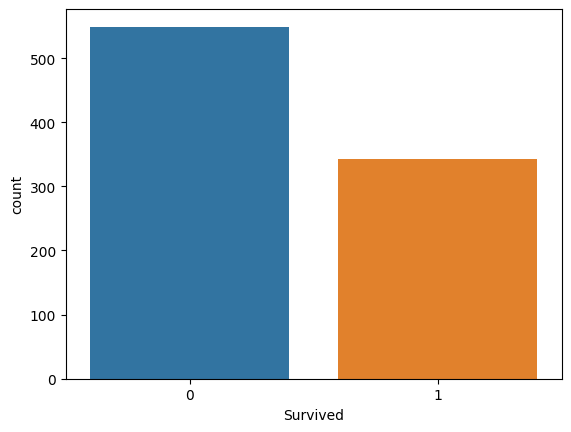

In [24]:
sns.countplot(x = 'Survived', data=data)


From the above graph it is clear that not many persons survived. Out of 891 persons in dataset only 350 survived, 38.4% of total
dataset survived.

2) Which Gender has more survival rate?

In [25]:
data.groupby(['Survived', 'Sex'])['Survived'].count()

Survived  Sex
0         0      468
          1       81
1         0      109
          1      233
Name: Survived, dtype: int64

<AxesSubplot: xlabel='Survived', ylabel='count'>

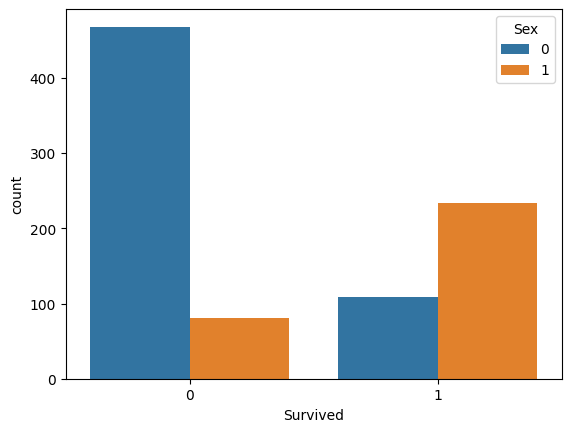

In [26]:
sns.countplot(x = 'Survived', hue = 'Sex', data = data)

As we can see, more female has survived than male. Out of 314 females 233 survived and out of 577 males only 109 survived. The survival ratio of female is more than male.

There were more males as compared to females ,but most of them died about 468 male and only 81 female are died.

3) What is Survival rate based on person type?

In [27]:
data.groupby(['Survived', 'Age_band']).count()['Sex']


Survived  Age_band
0         0           125
          Adult       395
          Children     27
          Infant        2
1         0            52
          Adult       250
          Children     28
          Infant       12
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Adult Survival Rate')

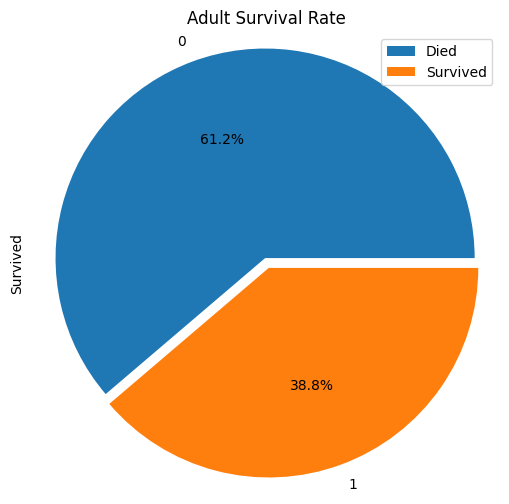

In [28]:
data[data['Age_band'] == 'Adult'].Survived.groupby(data.Survived).count().plot(kind='pie',figsize=(6, 6),explode=[0,0.05],
                                                                                autopct='%1.1f%%')
plt.axis('equal')
plt.legend(["Died","Survived"])
plt.title('Adult Survival Rate')

Text(0.5, 1.0, 'Children Survival Rate')

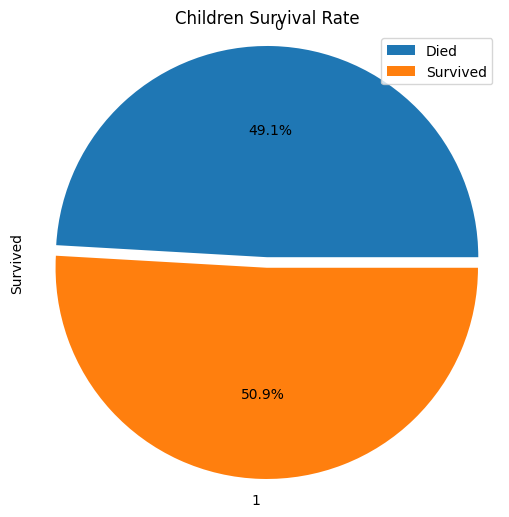

In [29]:
data[data['Age_band'] == 'Children'].Survived.groupby(data.Survived).count().plot(kind='pie',figsize=(6, 6),explode=[0,0.05],
                                                                                autopct='%1.1f%%')
plt.axis('equal')
plt.legend(["Died","Survived"])
plt.title('Children Survival Rate')

Text(0.5, 1.0, 'Infant Survival Rate')

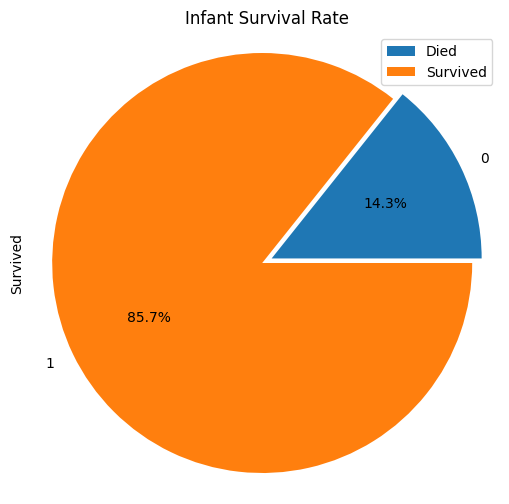

In [30]:
data[data['Age_band'] == 'Infant'].Survived.groupby(data.Survived).count().plot(kind='pie',figsize=(6, 6),explode=[0,0.05],
                                                                                autopct='%1.1f%%')
plt.axis('equal')
plt.legend(["Died","Survived"])
plt.title('Infant Survival Rate')

Majority passengers were adults. Almost half of total number of children survived. Most of adults failed to survive. More than 85% of infant survived.

4) Did Economy Class had an impact on survival rate?

In [31]:
data.groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

<AxesSubplot: xlabel='Pclass', ylabel='Survived'>

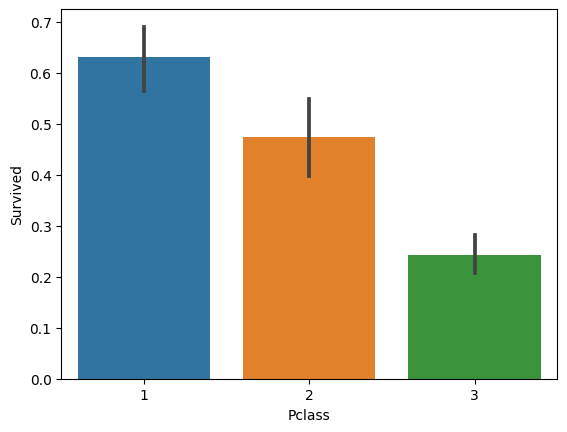

In [32]:
sns.barplot(x='Pclass', y='Survived', data=data)

<AxesSubplot: xlabel='Pclass', ylabel='Survived'>

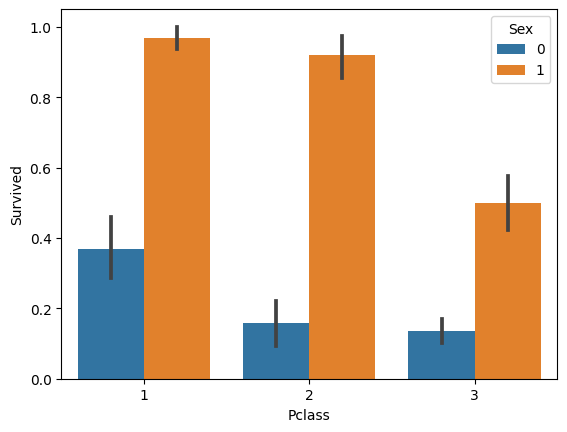

In [33]:
sns.barplot(x='Pclass',y='Survived',hue='Sex', data=data)

Most of the passengers travelled in third class but only 24% of them survived.
More passengers survived in first class and again female has given more priority.
Economic Class affected Survival rate and Passengers travelling with First Class had higher ratio of survival about 63% as compared to Class 2 and 3.

5) What is Survival Probability based on Embarkment of passengers?

<AxesSubplot: xlabel='Embarked', ylabel='count'>

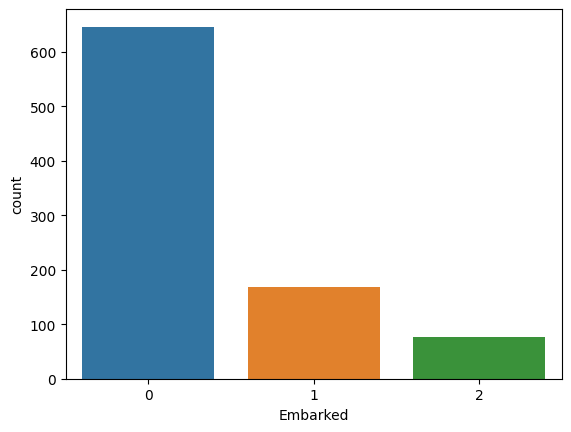

In [34]:
sns.countplot(x='Embarked', data=data)

Text(0, 0.5, 'Survival Probability')

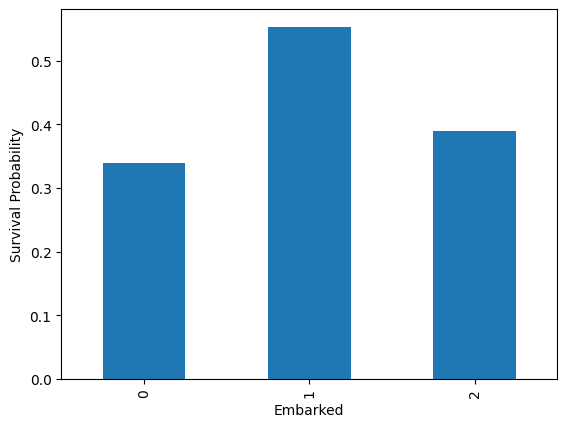

In [35]:
plt = data[['Embarked', 'Survived']].groupby('Embarked').mean().Survived.plot(kind='bar')
plt.set_xlabel('Embarked')
plt.set_ylabel('Survival Probability')

**Gender Survival based on Embarkment and Pclass**

In [36]:
pd.crosstab([data.Sex, data.Survived,data.Pclass],[data.Embarked], margins=True)

Embarked               0    1   2  All
Sex Survived Pclass                   
0   0        1        51   25   1   77
             2        82    8   1   91
             3       231   33  36  300
    1        1        28   17   0   45
             2        15    2   0   17
             3        34   10   3   47
1   0        1         2    1   0    3
             2         6    0   0    6
             3        55    8   9   72
    1        1        48   42   1   91
             2        61    7   2   70
             3        33   15  24   72
All                  646  168  77  891

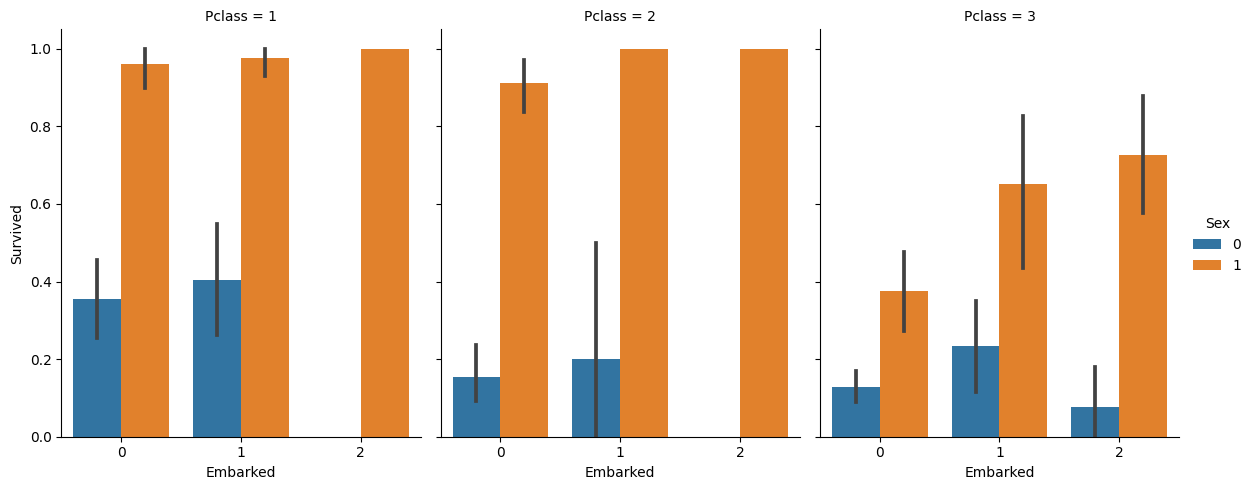

In [37]:
sns.catplot(x="Embarked", y="Survived", hue="Sex",col="Pclass", aspect=.8,kind='bar',data=data)

Most Passengers from port C Survived.

Most Passengers were from Southampton(S).

Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.

Males had better survival rate in Port C when compared for S and Q ports.

Females had least Survival rate in Pclass 3.

6) How is Fare distributed for Passesngers?



In [38]:
data['Fare'].min()

0.0

In [39]:
data['Fare'].max()

512.3292

In [40]:
data[['Fare_band', 'Survived']].groupby(['Fare_band'], as_index=False).mean().sort_values(by='Fare_band', ascending=True)

,Fare_band,Survived
0,1,0.199405
1,2,0.385246
2,3,0.446809
3,4,0.621212


<AxesSubplot: xlabel='Survived', ylabel='Fare'>

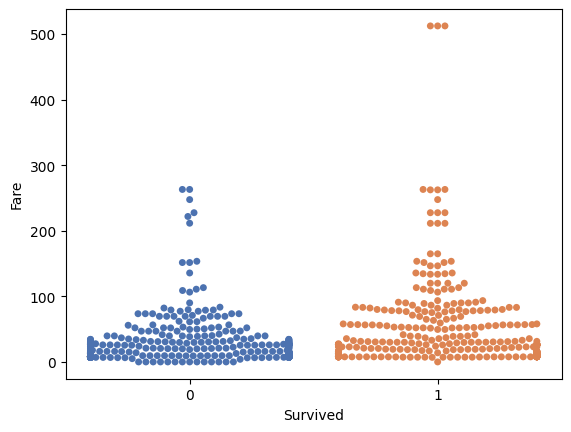

In [41]:
sns.swarmplot(x='Survived', y='Fare', data=data, palette="deep")

Most of the fare lies between 0-100 dollars. Passengers who paid more fare has higher chances of survival. Fare like 514 dollars was purchased by very few(Outliers).

7) What was Average Fare by Pclass and Embarked location?

<AxesSubplot: xlabel='Pclass', ylabel='Fare'>

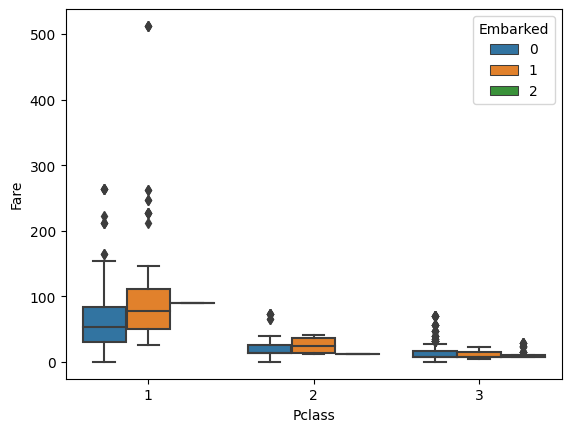

In [42]:
sns.boxplot(x = 'Pclass', y = 'Fare', data=data, hue='Embarked')

<AxesSubplot: xlabel='Embarked', ylabel='Fare'>

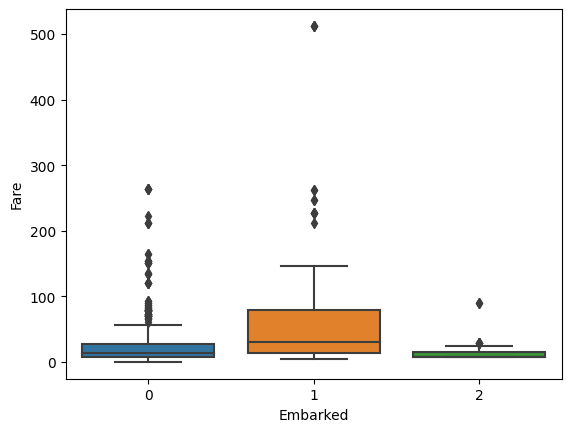

In [43]:
sns.boxplot(x = 'Embarked', y = 'Fare', data=data)

First Class Passengers paid major part of total Fare.
Passengers who Embarked from Port C paid Highest Fare

Text(0.5, 1.0, 'Age Distribution of Titanic Passengers')

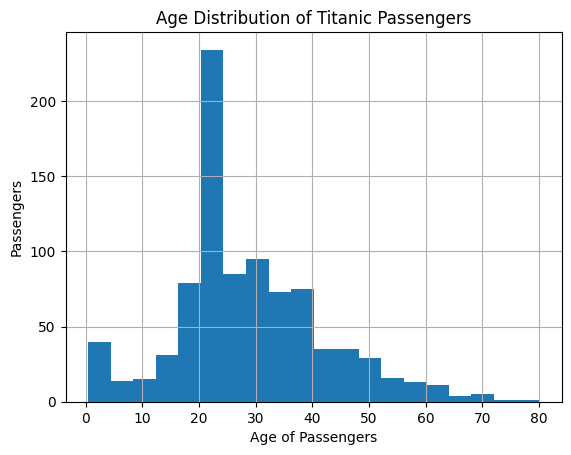

In [44]:
plt = data['Age'].hist(bins=20)
plt.set_ylabel('Passengers')
plt.set_xlabel('Age of Passengers')
plt.set_title('Age Distribution of Titanic Passengers')

The youngest passenger on the Titanic were toddlers under 6 months
The oldest were of 80 years of age.
The mean for passengers was a bit over 29 years i.e there were more young passengers in the ship.

**How Age has correlation with survival**

<AxesSubplot: xlabel='Age', ylabel='Density'>

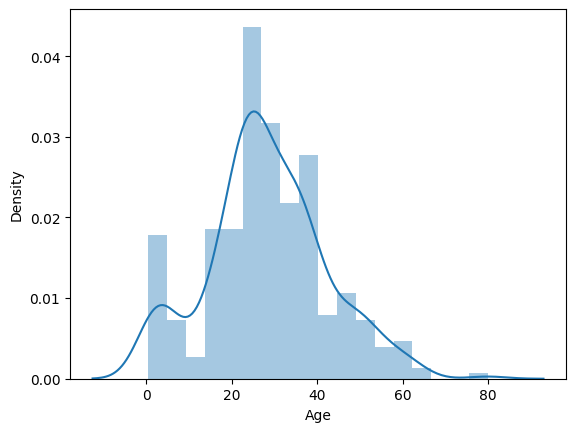

In [45]:
sns.distplot(data[data['Survived']==1]['Age'])

<AxesSubplot: xlabel='Age', ylabel='Density'>

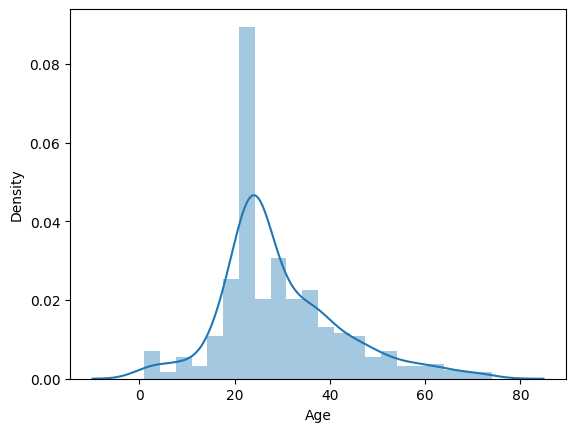

In [46]:
sns.distplot(data[data['Survived']==0]['Age'])

<AxesSubplot: xlabel='Sex', ylabel='Age'>

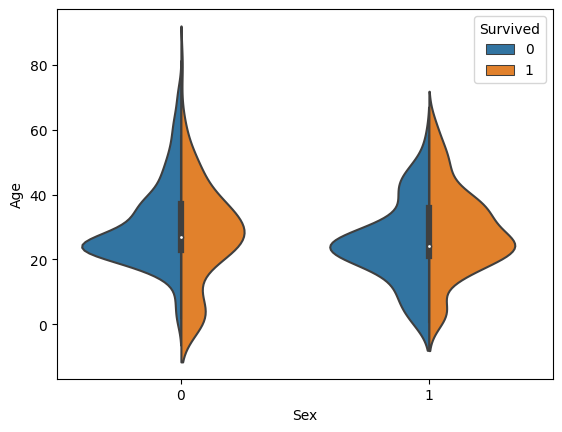

In [47]:
sns.violinplot(x='Sex',y='Age',hue='Survived',data=data,split=True)


Most of the passengers died.
Majority of passengers were between 25-40,most of them died
Female are more likely to survival

9) Did Solo Passengers has less chance of survival?

In [48]:
data['FamilySize'] = 0
data['FamilySize'] = data['Parch']+data['SibSp']
data['SoloPassenger']=0
data.loc[data.FamilySize==0,'SoloPassenger']=1

<AxesSubplot: xlabel='Sex', ylabel='SoloPassenger'>

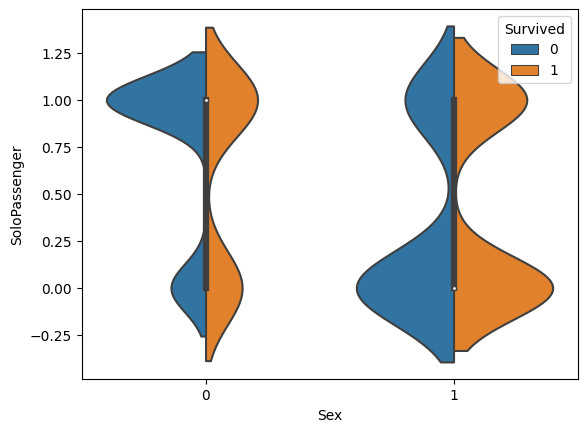

In [49]:
sns.violinplot(y='SoloPassenger',x='Sex',hue='Survived',data=data,split=True)


Most of the Passengers were travelling Solo and most of them died
Solo Females were more likely to Survive as compared to males
Passengers Class have a positive correlation with Solo Passenger Survival
Passengers Embarked from Port Q had Fifty -Fifty Chances of Survival

10) How did total family size affected Survival Count?



In [50]:
for i in data:
    data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False)


,Survived
FamilySize,
4,0.724138
3,0.578431
2,0.552795
7,0.333333
1,0.303538
5,0.200000
6,0.136364
8,0.000000
11,0.000000


<AxesSubplot: xlabel='FamilySize', ylabel='Survived'>

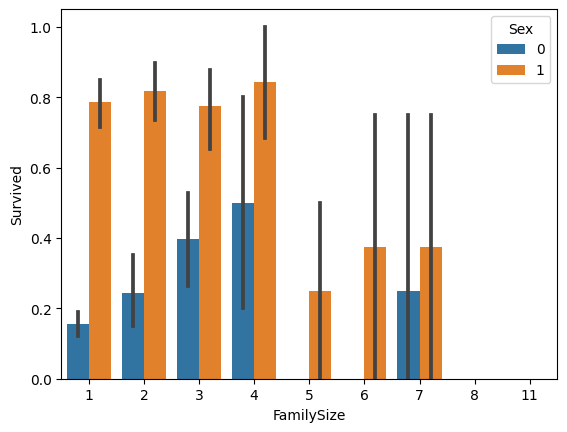

In [51]:
sns.barplot(x='FamilySize', y='Survived', hue='Sex', data=data)

Both men and women had a massive drop of survival with a FamilySize over 4.
The chance to survive as a man increased with FamilySize until a size of 4
Men are not likely to Survive with FamilySize 5 and 6
Big Size Family less likihood of Survival

11) How can you correlate Pclass/Age/Fare with Survival rate?

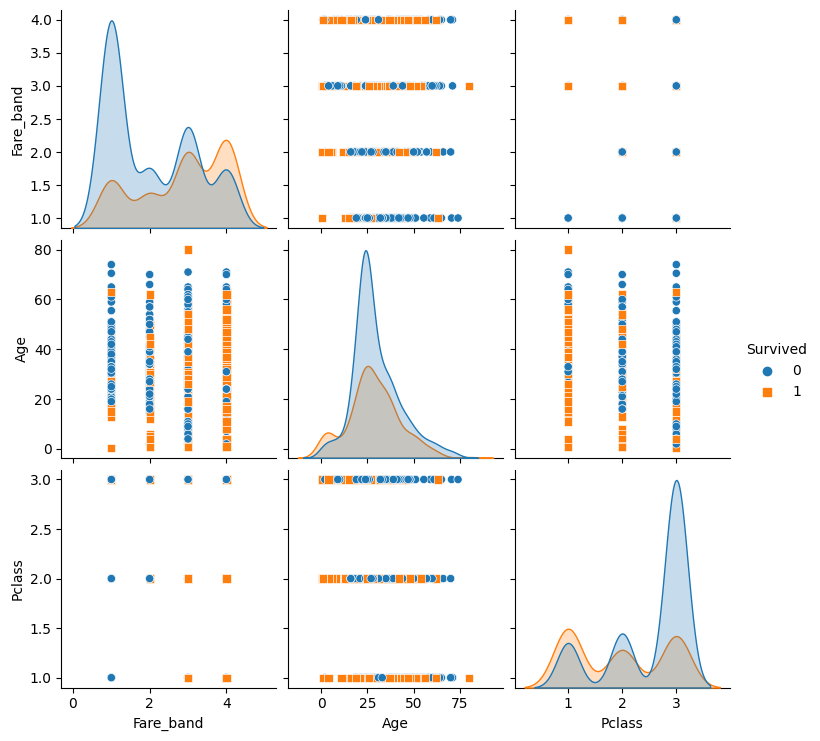

In [52]:
sns.pairplot(data[["Fare_band","Age","Pclass","Survived"]],vars= ["Fare_band","Age","Pclass"],hue="Survived", 
             dropna=True,markers=["o", "s"])

Fare and Survival has positive correlation

We cannt relate age and Survival as majority of travellers were of mid age

Higher Class Passengers had more likeihood of Survival

12) Which features had most impact on Survival rate?



<AxesSubplot: >

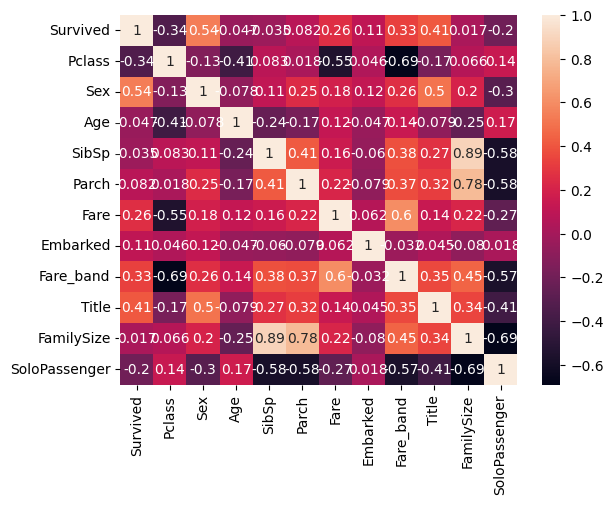

In [53]:
sns.heatmap(data.corr(),annot=True)


Older women have higher rate of survival than older men . Also, older women has higher rate of survival than younger women; an opposite trend to the one for the male passengers.
All the features are not necessary to predict Survival
More Features creates Complexitity
Fare has positive Correlation
For Females major Survival Chances , only for port C males had more likeihood of Survival.

## Standard Scalar

In [54]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(data.drop(['Survived', 'Age_band'], axis=1))
y = data['Survived']

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=8)

# Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logpredict = logreg.predict(X_test)

In [57]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(confusion_matrix(y_test, logpredict))
print(classification_report(y_test, logpredict))
print(accuracy_score(y_test, logpredict))

[[156  22]
 [ 31  86]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       178
           1       0.80      0.74      0.76       117

    accuracy                           0.82       295
   macro avg       0.82      0.81      0.81       295
weighted avg       0.82      0.82      0.82       295

0.8203389830508474


In [58]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, logpredict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8057236147123789

# Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
pred_dtree = dtree.predict(X_test)

In [60]:
print(confusion_matrix(y_test, pred_dtree))
print(classification_report(y_test,pred_dtree))
print(accuracy_score(y_test, pred_dtree))

[[156  22]
 [ 47  70]]
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       178
           1       0.76      0.60      0.67       117

    accuracy                           0.77       295
   macro avg       0.76      0.74      0.74       295
weighted avg       0.77      0.77      0.76       295

0.7661016949152543


In [61]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred_dtree)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7373475463363104

## Random Forest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=6, max_features=7)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [63]:
print(confusion_matrix(y_test, pred_rfc))
print(classification_report(y_test, pred_rfc))
print(accuracy_score(y_test, pred_rfc))

[[160  18]
 [ 29  88]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       178
           1       0.83      0.75      0.79       117

    accuracy                           0.84       295
   macro avg       0.84      0.83      0.83       295
weighted avg       0.84      0.84      0.84       295

0.8406779661016949


In [64]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred_rfc)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8255065783155671

# SVM Classifier

In [65]:
from sklearn.svm import SVC
svc = SVC(gamma = 0.01, C = 100)
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [66]:
print(confusion_matrix(y_test, pred_svc))
print(classification_report(y_test, pred_svc))
print(accuracy_score(y_test, pred_svc))

[[159  19]
 [ 28  89]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       178
           1       0.82      0.76      0.79       117

    accuracy                           0.84       295
   macro avg       0.84      0.83      0.83       295
weighted avg       0.84      0.84      0.84       295

0.8406779661016949


In [67]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred_svc)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8269710938250263

## Gradient Boosting Classifier

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)

In [69]:
print(confusion_matrix(y_test, gbc_pred))
print(classification_report(y_test, gbc_pred))
print(accuracy_score(y_test, gbc_pred))

[[165  13]
 [ 34  83]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       178
           1       0.86      0.71      0.78       117

    accuracy                           0.84       295
   macro avg       0.85      0.82      0.83       295
weighted avg       0.84      0.84      0.84       295

0.8406779661016949


In [70]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, gbc_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8181840007682706

## XG Boost Classifier

In [71]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
pred_xgb = xgb.predict(X_test)

In [72]:
print(confusion_matrix(y_test, pred_xgb))
print(classification_report(y_test, pred_xgb))
print(accuracy_score(y_test, pred_xgb))

[[156  22]
 [ 30  87]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       178
           1       0.80      0.74      0.77       117

    accuracy                           0.82       295
   macro avg       0.82      0.81      0.81       295
weighted avg       0.82      0.82      0.82       295

0.823728813559322


In [73]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred_xgb)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8099971189858831

# LightGBM 

In [74]:
!pip install lightgbm

In [75]:
import lightgbm as lgbm
lgb = lgbm.LGBMClassifier()
lgb.fit(X_train, y_train)
pred_lgb = lgb.predict(X_test)

[LightGBM] [Info] Number of positive: 225, number of negative: 371
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001345 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 212
[LightGBM] [Info] Number of data points in the train set: 596, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377517 -> initscore=-0.500102
[LightGBM] [Info] Start training from score -0.500102
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [76]:
print(confusion_matrix(y_test, pred_lgb))
print(classification_report(y_test, pred_lgb))
print(accuracy_score(y_test, pred_lgb))

[[160  18]
 [ 32  85]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       178
           1       0.83      0.73      0.77       117

    accuracy                           0.83       295
   macro avg       0.83      0.81      0.82       295
weighted avg       0.83      0.83      0.83       295

0.8305084745762712


In [77]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred_lgb)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8126860654950542

In [78]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# To store models created
best_models = {}


def print_best_parameters(hyperparameters, best_parameters):
    value = "Best parameters: "
    for key in hyperparameters:
        value += str(key) + ": " + str(best_parameters[key]) + ", "
    if hyperparameters:
        print(value[:-2])

def get_best_model(estimator, hyperparameters, fit_params={}):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    grid_search = GridSearchCV(estimator=estimator, param_grid=hyperparameters, n_jobs=-1, cv=cv, scoring="accuracy")
    best_model = grid_search.fit(X_train, y_train, **fit_params)
    best_parameters = best_model.best_estimator_.get_params()
    print_best_parameters(hyperparameters, best_parameters)
    return best_model

def evaluate_model(model, name):
    print("Accuracy score:", accuracy_score(y_train, model.predict(X_train)))
    best_models[name] = model

In [79]:
## Logistic Regression

hyperparameters = {
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty' : ['l2'],
    'C'       : [100, 10, 1.0, 0.1, 0.01]
}
estimator = LogisticRegression(random_state=1)
best_model_logistic = get_best_model(estimator, hyperparameters)

LR_accuracy = evaluate_model(best_model_logistic.best_estimator_, 'logistic')


Best parameters: solver: newton-cg, penalty: l2, C: 0.1
Accuracy score: 0.8187919463087249


In [80]:
## SVM Classifier

hyperparameters = {
    'C'      : [0.1, 1, 10, 100],
    'gamma'  : [0.0001, 0.001, 0.01, 0.1, 1],
    'kernel' : ['rbf']
}
estimator = SVC(random_state=1)
best_model_svc = get_best_model(estimator, hyperparameters)

SVM_accuracy = evaluate_model(best_model_svc.best_estimator_, 'svc')


Best parameters: C: 10, gamma: 0.01, kernel: rbf
Accuracy score: 0.837248322147651


In [81]:
## Decision Tree

hyperparameters = {
    'criterion'         : ['gini', 'entropy'],
    'splitter'          : ['best', 'random'],
    'max_depth'         : [None, 1, 2, 3, 4, 5],
    'min_samples_split' : list(range(2,5)),
    'min_samples_leaf'  : list(range(1,5))
}
estimator = DecisionTreeClassifier(random_state=1)
best_model_decision_tree = get_best_model(estimator, hyperparameters)

TREE_accuracy = evaluate_model(best_model_decision_tree.best_estimator_, 'decision_tree')


Best parameters: criterion: gini, splitter: best, max_depth: 5, min_samples_split: 2, min_samples_leaf: 3
Accuracy score: 0.8540268456375839


In [82]:
## Random Forest

hyperparameters = {
    'n_estimators'      : list(range(10, 50, 10)),
    'criterion'         : ['gini', 'entropy'],
    'max_depth'         : [None, 1, 2, 3, 4, 5],
}
estimator = RandomForestClassifier(random_state=1)
best_model_random_forest = get_best_model(estimator, hyperparameters)

FOREST_accuracy = evaluate_model(best_model_random_forest.best_estimator_, 'random_forest')


Best parameters: n_estimators: 40, criterion: entropy, max_depth: 5
Accuracy score: 0.8456375838926175


In [83]:
## Gradient Boosting

hyperparameters = {
    'learning_rate' : [0.01, 0.1, 0.2, 0.3],
    'n_estimators'  : [50, 100, 200],
    'max_depth'     : [2, 3, 4, 5]
}
estimator = GradientBoostingClassifier(random_state=1)
best_model_gbc = get_best_model(estimator, hyperparameters)

GB_accuracy = evaluate_model(best_model_gbc.best_estimator_, 'gbc')


Best parameters: learning_rate: 0.01, n_estimators: 200, max_depth: 4
Accuracy score: 0.8859060402684564


In [88]:
##XGBoost

hyperparameters = {
    'max_depth': [3, 5, 7, 9], 
    'n_estimators': [5, 10, 15, 20, 25, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1]
}
estimator = XGBClassifier(random_state=1)
best_model_XGB = get_best_model(estimator, hyperparameters)

XGB_accuracy = evaluate_model(best_model_XGB.best_estimator_, 'XGBClassifier')


Best parameters: max_depth: 5, n_estimators: 20, learning_rate: 0.1
Accuracy score: 0.889261744966443


In [85]:
##LightGBM

hyperparameters = {
    'n_estimators': [5, 10, 15, 20, 25, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [7, 15, 31],
}
estimator = lgbm.LGBMClassifier(random_state=1)
best_model_lgb = get_best_model(estimator, hyperparameters)

LGB_accuracy = evaluate_model(best_model_lgb.best_estimator_, 'lgb.LGBMClassifier')


[LightGBM] [Info] Number of positive: 225, number of negative: 371
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 212
[LightGBM] [Info] Number of data points in the train set: 596, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377517 -> initscore=-0.500102
[LightGBM] [Info] Start training from score -0.500102
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [158]:
LR_accuracy = 0.818
TREE_accuracy = 0.854
FOREST_accuracy = 0.845
SVM_accuracy = 0.837
GB_accuracy = 0.885
XGB_accuracy = 0.889
LGB_accuracy = 0.875

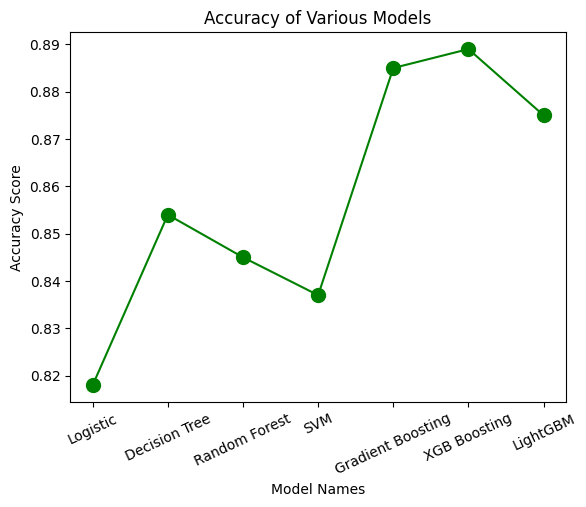

In [165]:
plt.plot(range(1,8),
         [LR_accuracy,TREE_accuracy,FOREST_accuracy,SVM_accuracy,GB_accuracy,XGB_accuracy,LGB_accuracy], marker='o',
        color = 'green', linestyle = '-', markersize = 10)
plt.xticks(range(1,8),['Logistic','Decision Tree','Random Forest','SVM','Gradient Boosting','XGB Boosting','LightGBM'],
           rotation=25)
plt.title('Accuracy of Various Models')
plt.xlabel('Model Names')
plt.ylabel("Accuracy Score")
plt.show()